In [49]:
%ls

clean_data.py                       lrs_goldengate_EDA.ipynb
cleaned_landsend_veg_2007_2012.csv  preprocess.ipynb
define_column.py                    preprocess_personal.ipynb
ideal_mix.json                      README.md
image.png                           wip.ipynb
landsend_veg_2007_2012.csv


## first import packages needed

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("landsend_veg_2007_2012.csv")
df.head()

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature
0,NUWO-2012,5,90,Low,-,-,-,-,-
1,NUWO-2012,13,150,Low,-,-,-,-,-
2,NMS-2010,8,20,Low,Achillea millefolium,ACMI,Native,Perennial,Forb
3,NMS-2010,24,4,Low,Achillea millefolium,ACMI,Native,Perennial,Forb
4,NMS-2010,48,16,Low,Achillea millefolium,ACMI,Native,Perennial,Forb


this is a wrong data point (**"SUDO-2014"**) according to Naomi, please delete it!

In [52]:
valid = df["Site-YearCode"] == "SUDO-2014"
valid  = ~((df["Species"] == "Bare ground") | (df["Species"] == "Bare Ground"))
df = df.loc[valid]

 count the frequencies of species in the data set

In [53]:
species = df[["Species"]].copy()
species["counts"] = 1
species_freq = species.groupby("Species").agg(sum).iloc[:,0].copy()
species_freq.sort(ascending=False)

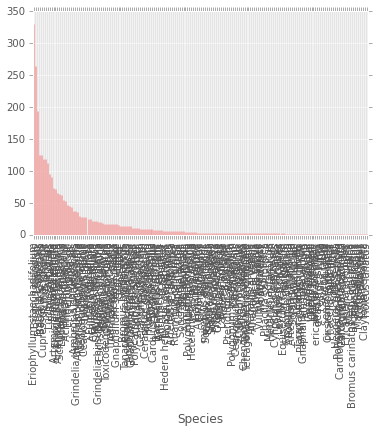

In [54]:
species_freq.plot(kind = "bar")
pass

Extract the **columns** we need (`"Site-YearCode"`, `"Species"`), and take **rows** which have no missing values ("-")

In [55]:
df_yr_sp = df[["Site-YearCode", "Species"]]
valid = ~ df_yr_sp.applymap( lambda x: x == "-").any(axis=1)
df_yr_sp = df_yr_sp.loc[valid]

split the `Site-YearCode` column into `site` and `year` columns

In [56]:
get_year = lambda x : int(x.split("-")[-1])
df_yr_sp["year"] = df_yr_sp["Site-YearCode"].map( get_year )

get_site = lambda x : (x.split("-")[0])
df_yr_sp["site"] = df_yr_sp["Site-YearCode"].map( get_site )

df_yr_sp.drop("Site-YearCode", axis=1, inplace = True)
df_yr_sp.head()

,Species,year,site
2,Achillea millefolium,2010,NMS
3,Achillea millefolium,2010,NMS
4,Achillea millefolium,2010,NMS
5,Achillea millefolium,2010,NMS
6,Achillea millefolium,2011,NMS


toy example: iterate over site and year groups:

In [57]:
for kk, vv in df_yr_sp.groupby(["site", "year"]):
    print(kk, vv["Species"].shape[0] )

(('EAPO', 2011), 385)
(('NMS', 2010), 208)
(('NMS', 2011), 146)
(('NMS', 2012), 328)
(('NUWO', 2010), 311)
(('NUWO', 2011), 115)
(('NUWO', 2012), 369)
(('SUDU', 2008), 346)
(('SUDU', 2009), 365)
(('SUDU', 2010), 208)
(('SUDU', 2011), 162)
(('SUDU', 2012), 191)
(('SUDU', 2013), 5)


In [58]:
spnum = df_yr_sp.groupby(["site", "year"]).agg("count")
spnum.head()

Species
site year         
EAPO 2011      385
NMS  2010      208
     2011      146
     2012      328
NUWO 2010      311

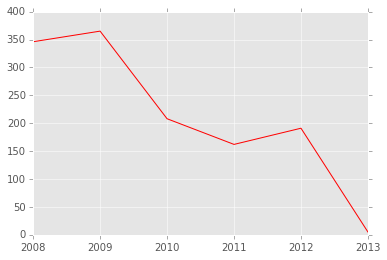

In [59]:
tt = spnum.loc["SUDU"].reset_index()["year"]
yy = spnum.loc["SUDU"]
plt.plot(tt, yy)

x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)

In [60]:
cols = ["Species","year", "site"]
df_yr_sp["count"] = 1

df_yr_sp.groupby(cols).agg("count").reset_index()

,Species,year,site,count
0,AVSP litter,2010,NUWO,2
1,Abronia latifolia,2008,SUDU,5
2,Abronia latifolia,2009,SUDU,1
3,Abronia latifolia,2010,SUDU,1
4,Abronia latifolia,2012,SUDU,1
5,Achillea millefolium,2010,NMS,5
6,Achillea millefolium,2010,NUWO,2
7,Achillea millefolium,2010,SUDU,5
8,Achillea millefolium,2011,NMS,5
9,Achillea millefolium,2011,SUDU,4


In [61]:
cols = ["Species","year", "site"]
df_yr_sp["count"] = 1
new_table = pd.pivot_table(
df_yr_sp.groupby(cols).agg("count").reset_index().\
drop("site", axis = 1).groupby(["Species","year"]).\
agg(sum).reset_index(), index = "Species", columns = "year").fillna(0).T.loc["count"]

new_table.head()

Species,AVSP litter,Abronia latifolia,Achillea millefolium,Achillea millefolium,Albizia lophantha,Ambrosia chamissonis,Anagalis arvensis,Anagallis arvensis,Anaphalis margaritacea,Annual exotic grass,...,Unknown grass,Vicia sativa,Viscia sativa,Vulpia bromoides,Vulpia myuros,Vulpia sp.,Woody debris,dead tree stump,ericameria ericoides,mimulus auranticus
year,,,,,,,,,,,,,,,,,,,,,
2008,0,5,0,12,0,14,0,0,0,0,...,22,0,0,0,0,0,0,0,1,3
2009,0,1,0,10,1,11,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2010,2,1,12,0,1,7,2,0,4,1,...,0,0,2,0,1,4,0,0,0,0
2011,0,0,9,0,0,1,0,1,1,0,...,0,1,0,1,4,25,2,0,0,0
2012,0,1,25,0,1,4,0,1,8,15,...,0,1,0,1,0,14,0,1,0,0


In [62]:
ordering = new_table.sum(axis=0).copy()
ordering.sort(ascending=False)
ordering.head(20)

Species
Eriophyllum staechadifolium    330
Bromus diandrus                265
Lolium sp.                     194
Fragaria chiloensis            125
Baccharis pilularis            125
Cupressus macrocarpa           119
Rubus ursinus                  118
Avena sp.                      112
Lupinus arboreus                95
Briza maxima                    90
Ehrharta erecta                 73
Artemisia pycnocephala          71
Eriogonum latifolium            65
Artemisia pycnocephala          64
Scrophularia californica        62
Lupinus chamissonis             54
Marah fabaceus                  53
Achillea millefolium            46
Erigeron glaucus                44
Vulpia sp.                      43
dtype: float64

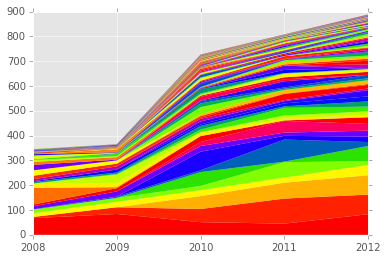

In [63]:
from mpltools import style
from mpltools import color
style.use('ggplot')
n_lines=100
color.cycle_cmap(n_lines, cmap="prism")

x = new_table.index.tolist()
fig, ax = plt.subplots()
ax.stackplot(x, new_table[ordering.index.tolist()].as_matrix().T, edgecolor="None")

plt.xlim([2008,2012])
plt.xticks(list(range(2008,2013)))
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.savefig("image.png",bbox_inches='tight',dpi=100)
pass

In [64]:
new_table.index.tolist()[1:-1]



[2009, 2010, 2011, 2012]

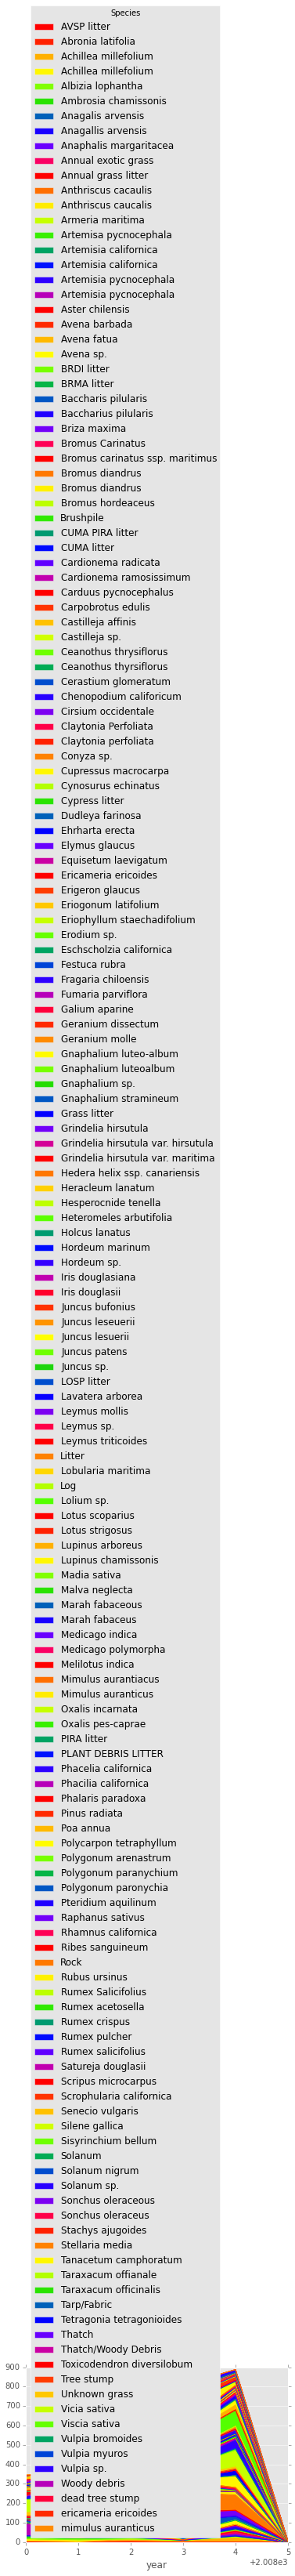

In [65]:
plt.figure(); new_table.plot(kind='area');